#  <font color=green>Lending Club Case Study</font>


### Project Brief 

A Consumer Finance Company, which specializes in lending various types of loans to urban customers based on their loan application, wants to make a decision for loan approval based on the applicant’s profile.

### Objective 

The aim of this analysis is to understand the _**driving factors (or driver variables)**_ behind loan `default`, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its `portfolio and risk assessment`.


`'Risks'` associated with the bank’s decision : 

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


We will use `EDA` to understand how _**`consumer attributes`**_ and _**`loan attributes`**_ influence the tendency of default

In [3]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

- Avoiding exponential based representation

In [5]:
pd.options.display.float_format = "{:.2f}".format

In [6]:
# loading dataset from loan.csv file

loan = pd.read_csv("loan.csv",sep=',')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [7]:
loan.shape

(39717, 111)

## <font color=green> Data Cleaning - Part 1</font>

### Fixing columns

1. Delete columns: Delete unnecessary columns
    - There are total `54 columns` having all the row values as `NaN` so dropping them all
    - There are few columns which have huge % of values are `null` so dropping them also <br>
        _**next_pymnt_d                  97.13%**_ <br>
        _**mths_since_last_record        92.99%**_ <br>
        _**mths_since_last_delinq        64.66%**_ <br>
        _**desc                          32.58%**_ <br>

In [8]:
# percentage of null values in each column

(loan.isnull().sum()/len(loan)*100)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [9]:
# number of columns where all values are null

(loan.isnull().sum()/len(loan)*100 == 100).sum()

54

In [10]:
# dropping columns with all null values

loan.dropna(axis=1,how='all',inplace=True)

In [11]:
# percentage of null values in each column

(loan.isnull().sum()/len(loan)*100)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [12]:
# finding out columns with more than 30% null values

tempDf = pd.DataFrame(loan.isnull().sum()/len(loan)*100)
columns2drop = list(tempDf[tempDf[0] > 30].index)
columns2drop

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [13]:
# dropping columns with more than 30% null values

loan.drop(columns=columns2drop,inplace=True)

In [14]:
# percentage of null values in each column

(loan.isnull().sum()/len(loan)*100)

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
pymnt_plan                   0.00
url                          0.00
purpose                      0.00
title                        0.03
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal     

In [15]:
loan.shape

(39717, 53)

### Fix columns - Part 2
1. Delete columns: Delete unnecessary columns
   There are many columns which are not useful for any analysis hence dropping them <br>
    - `funded_amnt` — not useful as we will be only considering loan_amnt column <br>
    - `funded_amnt_inv` — not useful as we will be only considering loan_amnt column <br>
    - `id` — random value unique field for identification purposes only.<br>
    - `member_id` — random value unique field for identification purposes only. <br>
    - `application_type` - All rows have single value `INDIVIDUAL` only <br>
    - `chargeoff_within_12_mths` - All rows `0` or `NA` only <br>
    - `collections_12_mths_ex_med` - All rows `0` or `NA` only <br>
    - `delinq_amnt` - All rows `0` only <br>
    - `initial_list_status` - All rows `f` only <br>
    - `policy_code` - All rows `1` only <br>
    - `pymnt_plan` - All rows `n` only <br>
    - `tax_liens` - All rows `0` or `NA` only <br>
    - `acc_now_delinq` - All rows `0` only <br>
    and other un-wanted columns

In [16]:
for i in loan.columns :
    if loan[i].nunique() == 1 :
        print(i + ' : ' + str(loan[i].unique()))

pymnt_plan : ['n']
initial_list_status : ['f']
collections_12_mths_ex_med : [ 0. nan]
policy_code : [1]
application_type : ['INDIVIDUAL']
acc_now_delinq : [0]
chargeoff_within_12_mths : [ 0. nan]
delinq_amnt : [0]
tax_liens : [ 0. nan]


In [17]:
# dropping out unnecessary columns 

columns2drop = ['funded_amnt','funded_amnt_inv','id','member_id','application_type','chargeoff_within_12_mths',
                'collections_12_mths_ex_med','delinq_amnt','initial_list_status','policy_code','pymnt_plan','tax_liens',
                'earliest_cr_line','pub_rec','addr_state','installment']

loan.drop(columns=columns2drop,inplace=True)


In [18]:
loan.shape

(39717, 37)

### Fix columns - Part 3
- Below columns are not having any significance for loan_status = Charged-off, this include customer bahaviour variables which are not available during time of loan processing
    - collection_recovery_fee
    - emp_title
    - last_credit_pull_d
    - last_pymnt_amnt
    - last_pymnt_d
    - recoveries
    - title
    - total_pymnt
    - total_pymnt_inv
    - total_rec_int
    - total_rec_late_fee
    - total_rec_prncp
    - url
    - zip_code
    - out_prncp
    - out_prncp_inv
    - revol_util

In [19]:
# dropping out columns which are not available during time of loan processing

columns2drop = ['collection_recovery_fee','emp_title','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d', 'recoveries','revol_bal','title','total_pymnt','total_pymnt_inv',
                'total_rec_int','total_rec_late_fee','total_rec_prncp','url','zip_code','out_prncp', 'out_prncp_inv', 
                 'acc_now_delinq', 'revol_util', 'delinq_2yrs', 'open_acc', 'total_acc']

loan.drop(columns=columns2drop,inplace=True)
loan.shape

(39717, 15)

In [20]:
# percentage of null values in each column

(loan.isnull().sum()/len(loan)*100)

loan_amnt              0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
inq_last_6mths         0.00
pub_rec_bankruptcies   1.75
dtype: float64

- `'emp_length'` column have <b>2.71%</b> of null values which can be imputed with mode, i.e. , <b>10+ years</b>

In [21]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [22]:
# imputing emp_length null values with '10+ years'

loan.emp_length.fillna('10+ years',inplace = True)

- In the same way we will impute `'pub_rec_bankruptcies'` column null values with the mode value

In [23]:
loan.pub_rec_bankruptcies.fillna(loan.pub_rec_bankruptcies.mode()[0],inplace = True)

In [24]:
# percentage of null values in each column

(loan.isnull().sum()/len(loan)*100)

loan_amnt              0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
inq_last_6mths         0.00
pub_rec_bankruptcies   0.00
dtype: float64

In [25]:
loan.shape

(39717, 15)

### Fixing Rows

- loan_status = 'Current' is not considered for analysis , since it represents a on going loan

In [26]:
loan = loan[~(loan['loan_status'] == 'Current')]

In [27]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [28]:
loan.shape

(38577, 15)

### Standardizing values
- Converting column values to required format 
    - intrest rate
    - employment length
    - term

In [29]:
loan.dtypes

loan_amnt                 int64
term                     object
int_rate                 object
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
inq_last_6mths            int64
pub_rec_bankruptcies    float64
dtype: object

In [30]:
loan[['term']].head()

,term
0,36 months
1,60 months
2,36 months
3,36 months
5,36 months


In [31]:
# converting 'term' column values to integer by removing the 'months' from the end
loan.term.unique()
loan.term = loan.term.apply(lambda x : int(x.replace('months','')))

In [32]:
loan.term.dtype

dtype('int64')

In [33]:
loan.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [34]:
# removing the % symbol from int_rate column values and converting them to float values

loan.int_rate = loan.int_rate.apply(lambda x : float(x.replace('%','')))
loan.int_rate.dtype

dtype('float64')

In [35]:
loan.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

In [36]:
# converting emp_length values to integer type and imputing '< 1 years' with '0' and '10+ years' with '10'


loan.emp_length = loan.emp_length.str.replace('years','').str.replace('year','').str.strip()
loan.emp_length = loan.emp_length.str.replace('< 1','0').replace('10+','10')
loan.emp_length = loan.emp_length.astype('int64')

In [37]:
loan.emp_length.dtype

dtype('int64')

In [38]:
loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,pub_rec_bankruptcies
0,5000,36,10.65,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,27.65,1,0.00
1,2500,60,15.27,C,C4,0,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,1.00,5,0.00
2,2400,36,15.96,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,0.00
3,10000,36,13.49,C,C1,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,20.00,1,0.00
5,5000,36,7.90,A,A4,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,11.20,3,0.00


In [39]:
loan.shape

(38577, 15)

## <font color=green> Data Cleaning - Part 2</font>

In [40]:
loan.annual_inc.describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

<AxesSubplot:ylabel='annual_inc'>

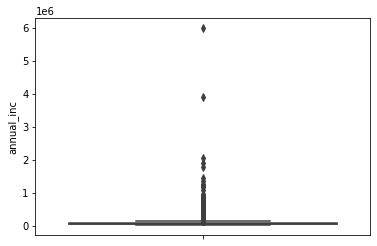

In [41]:
# plotting box-plot for annual_inc to analyse outliers

sns.boxplot(data=loan,y='annual_inc',orient='v')

In [42]:
# we can see that most of the values(annual_inc) are less than ~200,000 
# we can say that values above 200,000 are outlier
# hence, considering only those rows where annual_inc is less then or equal to 200,000

loan = loan[loan.annual_inc<=200000]
loan.shape

(38007, 15)

<AxesSubplot:ylabel='annual_inc'>

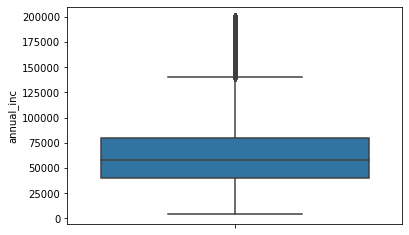

In [43]:
# plotting box-plot for annual_inc after removing outliers

sns.boxplot(data=loan,y='annual_inc',orient='v')

# <font color=blue> Univariate Analysis </font>


###  Writing Functions

1. _**uni_continuous:**_ This function is used to plot Distribution and Box graphs for continuous variables
2. _**plot_pie:**_ This function is used to plot pie chart for categorical variables
3. _**plot_count:**_ This function is used to plot count plot for categorical variables
4. _**seg_uni_2:**_ This function is used to plot bar chart for segmented categorical variables w.r.t that category


In [44]:
def uni_continuous(df,column,title) :
    # plotting boxplot and disptribution plot of the specified column in function
    # df : Dataset
    # column : column name on which univariate analysis is to be performed
    # title : title of the plot
    plt.style.use("ggplot")
    plt.figure(figsize=(14,6),dpi=80)
    plt.subplot(121)
    plt.title(title + " - Box Plot", fontsize=18,pad=15);
    sns.boxplot(data=df,y=column,orient='v')
    
    plt.subplot(122)
    
    sns.distplot(df[column])
    plt.title(title + " - Distribution Plot", fontsize=18,pad=15);
    plt.show()
    


def plot_pie(data,title) :
    ## Plotting pie chart
    # data : Dataset
    # title : title of the plot
    
    plt.figure(figsize=(5,5),dpi=100)
    plt.style.use("ggplot")

    labels = data.keys()
    plt.pie(x=data, autopct="%1.1f%%", explode=[0.009]*len(labels), labels=labels, pctdistance=0.5,startangle=45)
    plt.title(title, fontsize=18);
    plt.axis('equal')
    plt.show()
    

def plot_count(df,column,title='',orient='v',x='',y='') :
    ## plotting count plot
    # df : Dataset
    # column : column name for which count plot is to be plotted
    # orient : orientation of bar plot ('v' or 'h')
    # x : x-axis label on the plot
    # y : y-axis label on the plot
    # title : title of the plot
    
    plt.figure(figsize=(5,5),dpi=100)
    plt.style.use("ggplot")

    plt.title(title, fontsize=18);
    if orient == 'v' :
        g = sns.countplot(data=df,x=column,orient='h',order=df[column].value_counts().index.sort_values())
        for index, row in df[column].value_counts().reset_index().sort_values(by='index').reset_index()[[column]].iterrows():
            g.text(row.name , row[0]+5, row[0], color='black', ha="center")
    else : 
        g = sns.countplot(data=df,y=column,orient='v',order=df[column].value_counts().index.sort_values())
        for index, row in df[column].value_counts().reset_index().sort_values(by='index').reset_index()[[column]].iterrows():
            g.text(row[0]+800, row.name, row[0], color='black', ha="center")
    g.set(xlabel=x, ylabel=y)
    plt.show()
    
    

def seg_uni_2(df,index,title='',x='',y='',size=12,rot=0) :
    
    # df : Dataset
    # index : column name on which univariate analysis is to be performed
    # orient : orientation of bar plot ('v' or 'h')
    # x : x-axis label on the plot
    # y : y-axis label on the plot
    # title : title of the plot
    # size : font size of annotation text
    # rot : rotation of x-axis ticks
    
    t = pd.pivot_table(data=df,index=[index,"loan_status"],values="loan_amnt",aggfunc="count").reset_index()
    t2 = t.groupby(index)['loan_amnt'].sum().reset_index()
    final_df = pd.merge(t,t2,how='inner',on=index)
    final_df['percent'] = final_df['loan_amnt_x']/final_df['loan_amnt_y']*100

    plt.figure(figsize=(12,7),dpi=80)
    plt.style.use("ggplot")
    g = sns.barplot(data=final_df,x=index,y='percent',hue='loan_status')
    for bar in g.patches:

      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        g.annotate(format(str(round(bar.get_height(),1)) + '%'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=size, xytext=(0, 8),
                       textcoords='offset points')
    g.set(xlabel = x,ylabel = y)
    plt.title(title,pad=15)
    plt.xticks(rotation=rot)
    plt.show()

### Analysis each attribute in dataset to unserstand it's distribution and type of variable

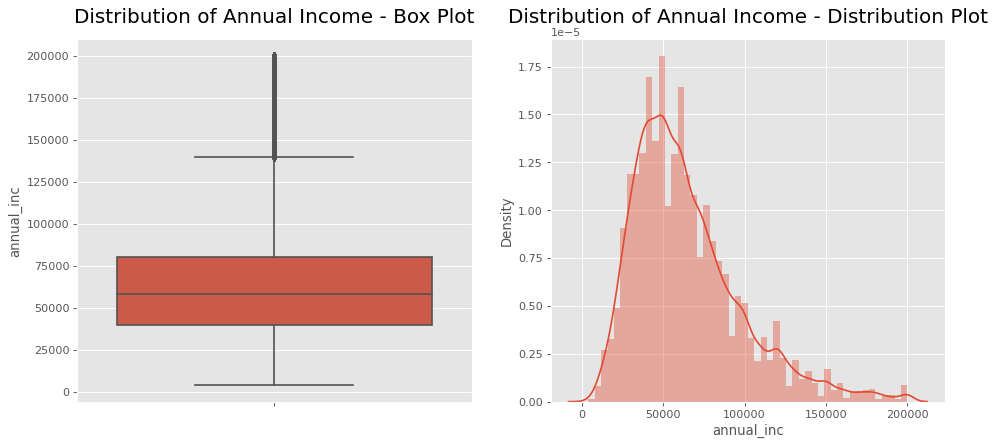

In [45]:
uni_continuous(loan,"annual_inc","Distribution of Annual Income")

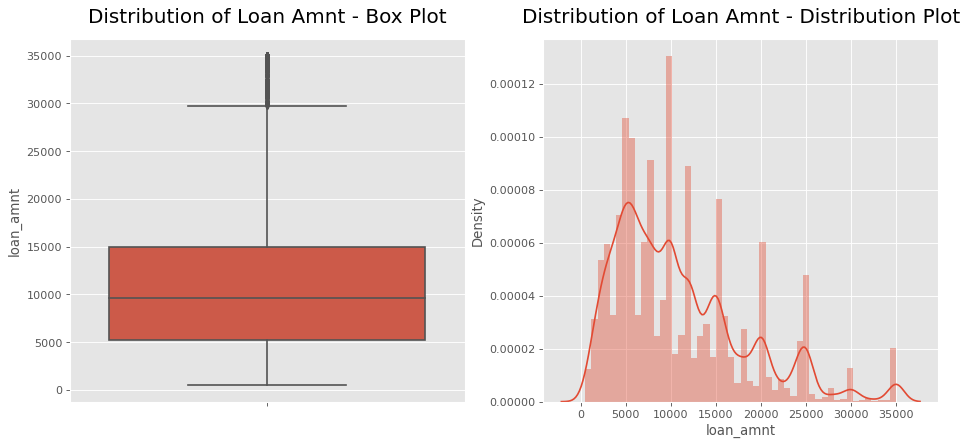

In [46]:
uni_continuous(loan,"loan_amnt","Distribution of Loan Amnt")

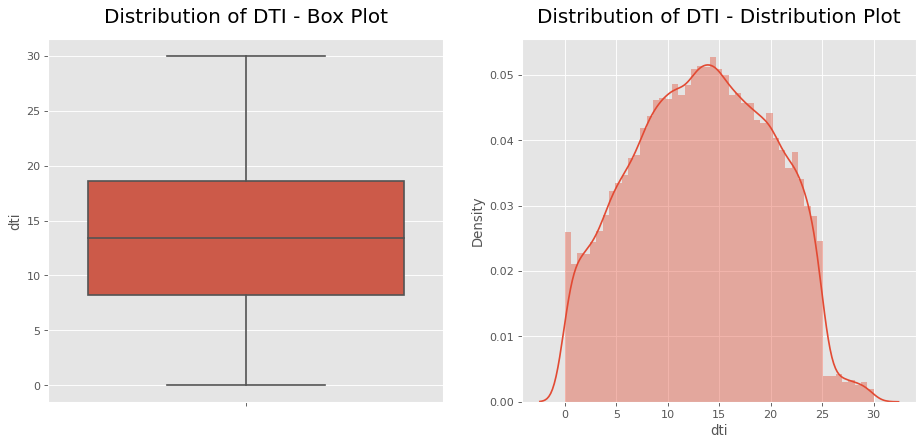

In [47]:
uni_continuous(loan,"dti","Distribution of DTI")

- from above distribution plots we can say that `'annual_inc'` & `'dti'` attributes are normally distributed

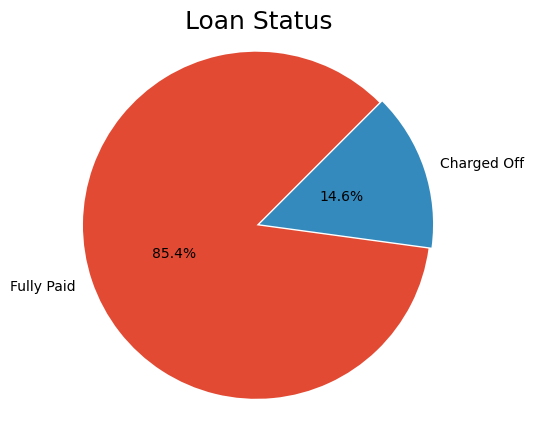

In [48]:
# distribution of loan dataset in terms of 'loan_status'

per_loan_status = loan.loan_status.value_counts()*100/len(loan)
plot_pie(per_loan_status,'Loan Status')

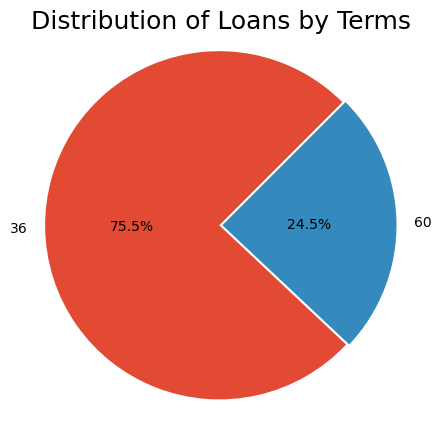

In [49]:
# distribution of loan dataset in terms of 'term' of loan

per_term = loan.term.value_counts()*100/len(loan)
plot_pie(per_term,"Distribution of Loans by Terms")

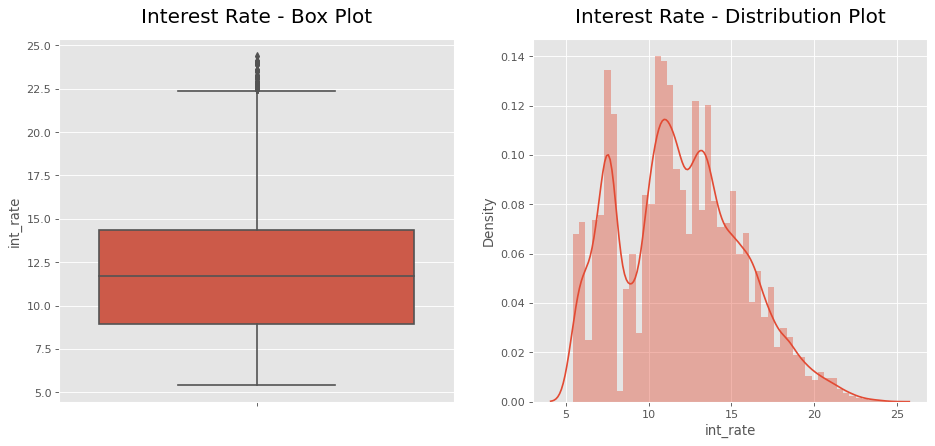

In [50]:
uni_continuous(loan,"int_rate","Interest Rate")

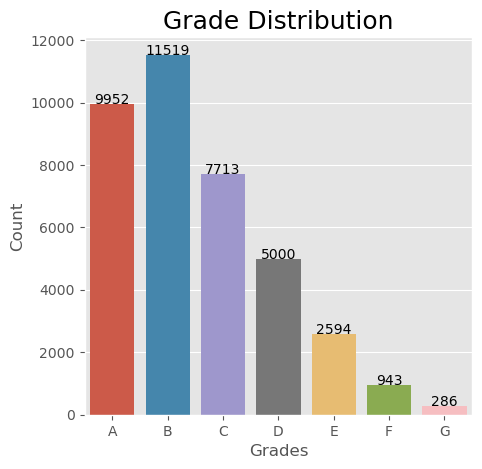

In [51]:
plot_count(loan,"grade","Grade Distribution",x='Grades',y='Count')

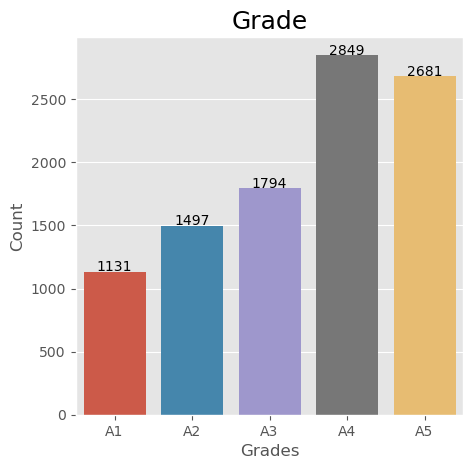

In [52]:
plot_count(loan[loan.sub_grade.str.contains('A')],"sub_grade","Grade",x='Grades',y='Count')

In [53]:
loan.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

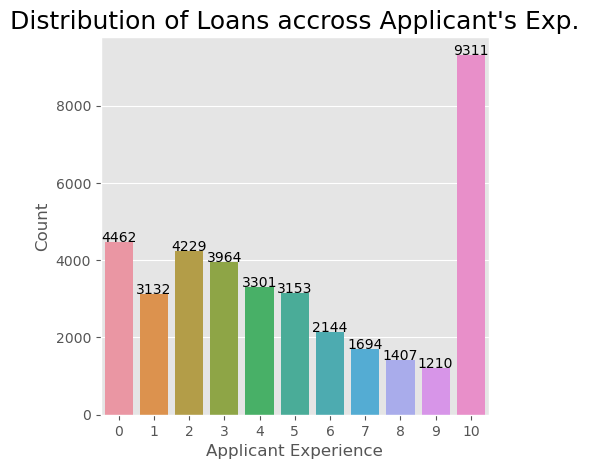

In [54]:
plot_count(loan[loan.emp_length!=11],"emp_length",title="Distribution of Loans accross Applicant's Exp.",x='Applicant Experience',y='Count')

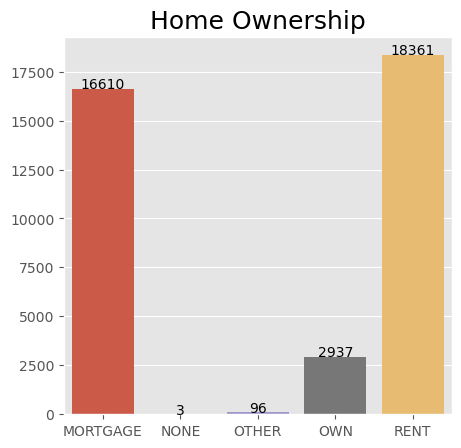

In [55]:
plot_count(loan,"home_ownership","Home Ownership")

## Inference :
 - we can say that most of the loans are taken by customers living on `'RENT'` and `'MORTGAGE'`

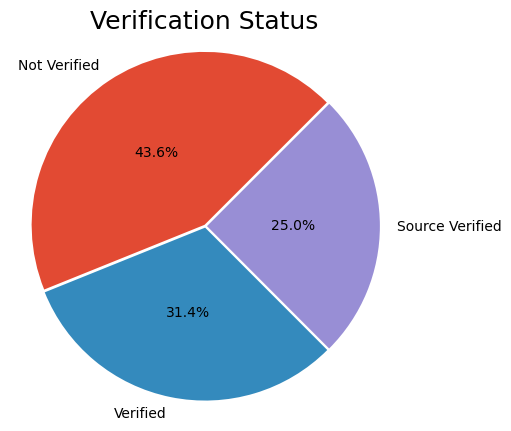

In [56]:
data = loan.verification_status.value_counts()
plot_pie(data,"Verification Status")

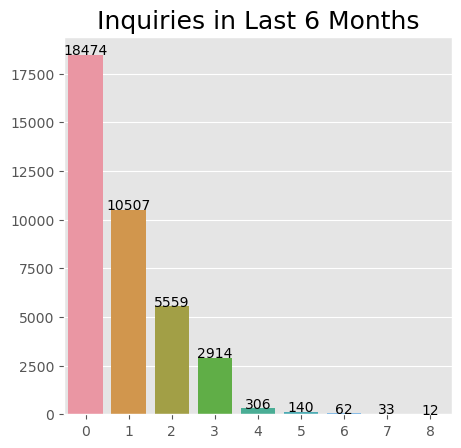

In [57]:
plot_count(loan,'inq_last_6mths','Inquiries in Last 6 Months')

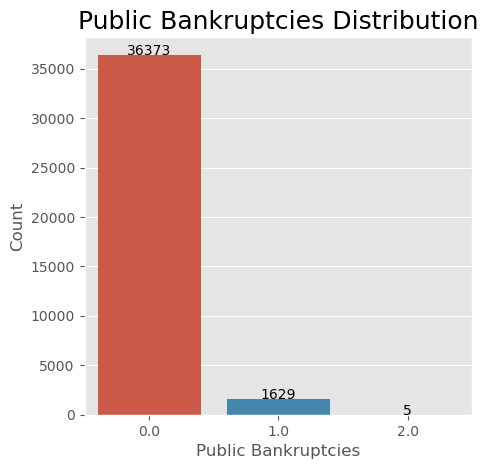

In [58]:
plot_count(loan,'pub_rec_bankruptcies','Public Bankruptcies Distribution',x='Public Bankruptcies',y='Count')

### Derived Variable

1. `issue_y` from <b>issue_d</b> column
2. `issue_m` from <b>issue_d</b> column
3. `int_rate_bin` from <b>int_rate</b> column
4. `loan_amnt_bin` from <b>loan_amnt</b> column
5. `annual_inc_bin` from <b>annual_inc</b> column
6. `dti_bin` from <b>dti</b> column

In [59]:
# extracting month and year from issue_d column into new columns issue_m and issue_y respectively
loan["issue_m"] = loan["issue_d"].apply(lambda x : x[:3])
loan["issue_y"] = loan["issue_d"].apply(lambda x : int('20' + x[-2:]))

# using cut method of pandas to create bins for continuous variable
loan['int_rate_bin'] = pd.cut(loan['int_rate'],3)
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'],5)
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'],5)
loan['dti_bin'] = pd.cut(loan['dti'], 3)

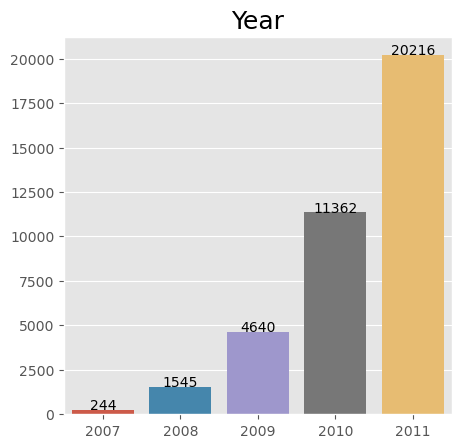

In [60]:
plot_count(loan,'issue_y','Year')

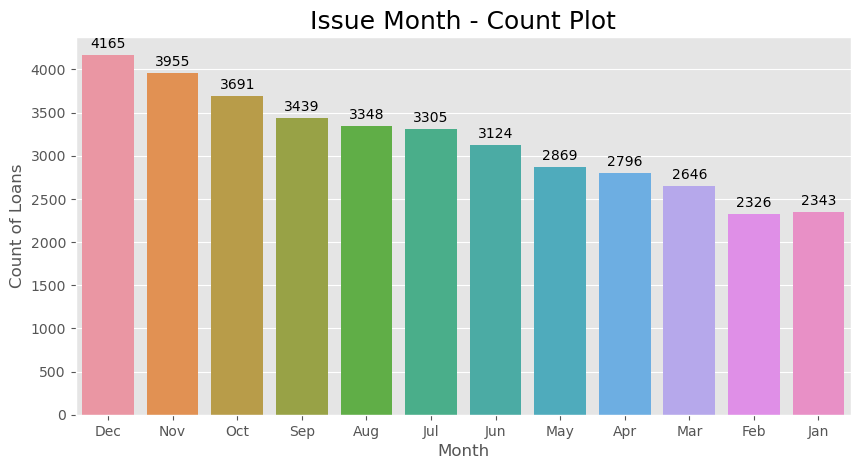

In [61]:
# plotting count plot for number of loans approved in each month

plt.figure(figsize=(10,5),dpi=100)
plt.style.use("ggplot")
plt.title("Issue Month - Count Plot", fontsize=18);
g = sns.countplot(data=loan,x='issue_m',orient='h')

# annotating
for bar in g.patches:
    g.annotate(format(str(round(bar.get_height(),1))), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('Month')
plt.ylabel('Count of Loans')
plt.show()
#plot_count(loan,"issue_m","Issue Month")

### Inference
- We can say that the number of loans sanctioned are increasing steadily from JANUARY till DECEMBER
- Reason may be, because in year end people want to go to vacation and enjoy in christmas

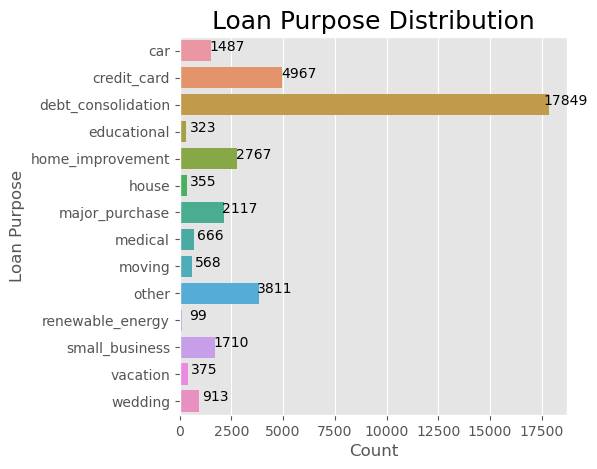

In [62]:
plot_count(loan,"purpose","Loan Purpose Distribution",'h',x='Count',y='Loan Purpose')

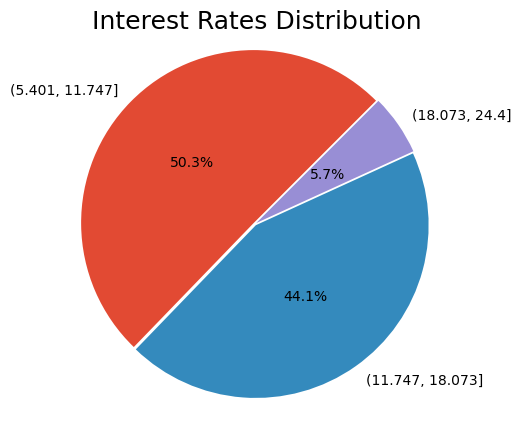

In [63]:
data = loan.int_rate_bin.value_counts()
plot_pie(data,"Interest Rates Distribution")

### Inference
- Most of the loans are taken for Dept Consolidation & Credit Card Purpose

# Segmented Univariate

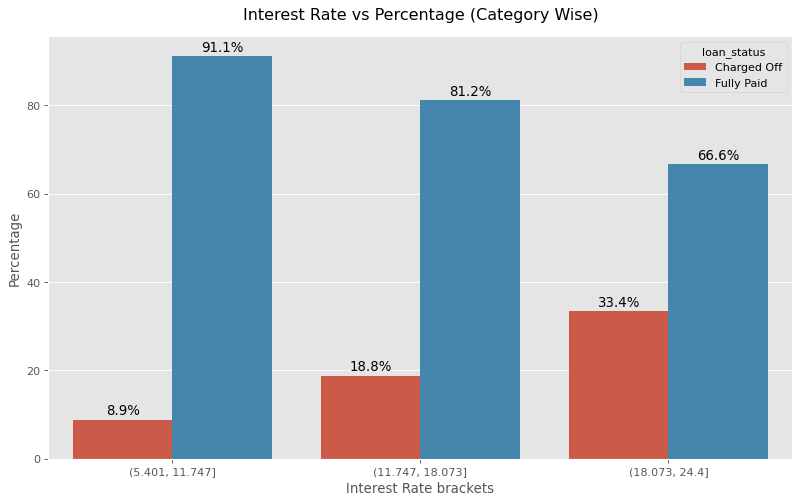

In [64]:
seg_uni_2(loan,"int_rate_bin",title='Interest Rate vs Percentage (Category Wise)',y='Percentage',x='Interest Rate brackets')


### Inference
- from the chart, we can infer that loans with Higher Interest Rates (>18%) are more likely to become charge off than that with less interest rates.

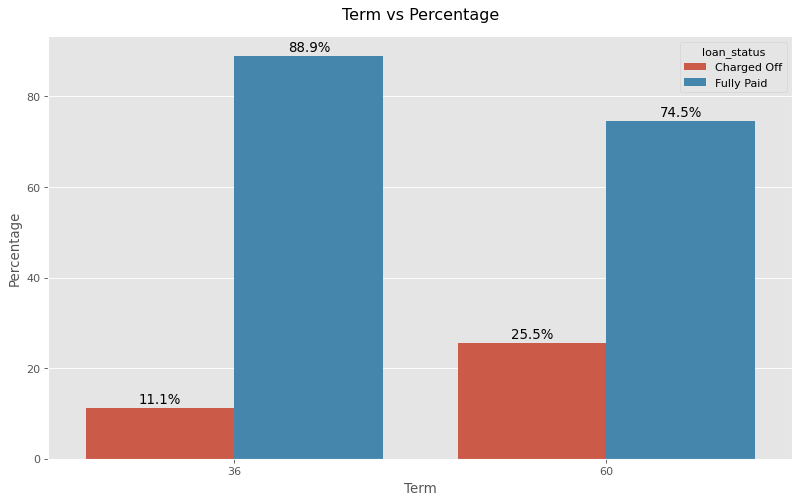

In [65]:
seg_uni_2(loan,'term',title='Term vs Percentage',x='Term',y='Percentage')

### Inference
- Loans with <b>60 months Term are more likely to charge off</b> than that with 36 months term

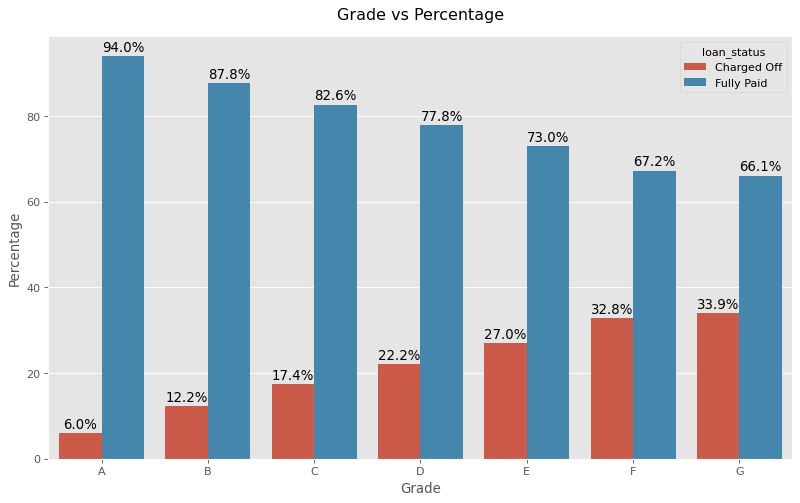

In [66]:
seg_uni_2(loan,'grade',title='Grade vs Percentage',x='Grade',y='Percentage')

### Inference
- As the Grade Increase from `'A'` to `'G'` the <b>charge off percentage also increases</b>
- Hence, it is better to give loans to customer with good grade (from A till C)
- And, we should be more careful while sanctioning loan to customers with bad grade

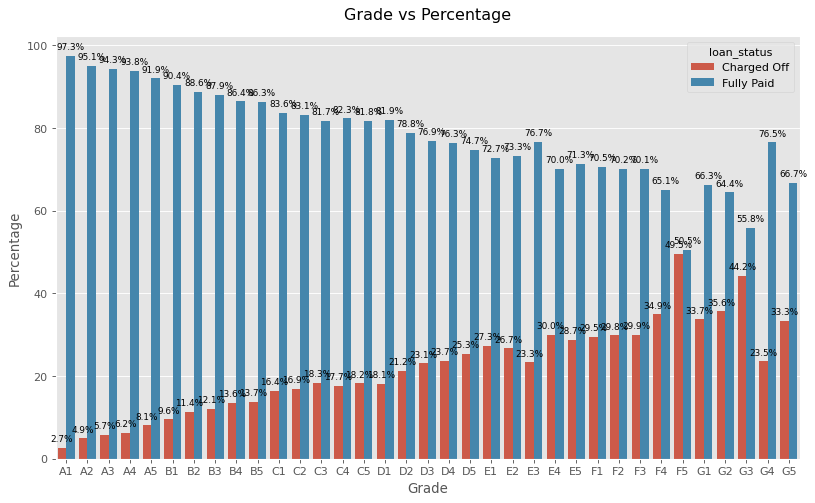

In [67]:
seg_uni_2(loan,'sub_grade',title='Grade vs Percentage',x='Grade',y='Percentage',size=8)

### Inference

- We can see that as sub_grade of applicant decreases they become less likely to repay loan.
- It is risky to give loan to any applicant with sub_grade <b>D2 or below</b>

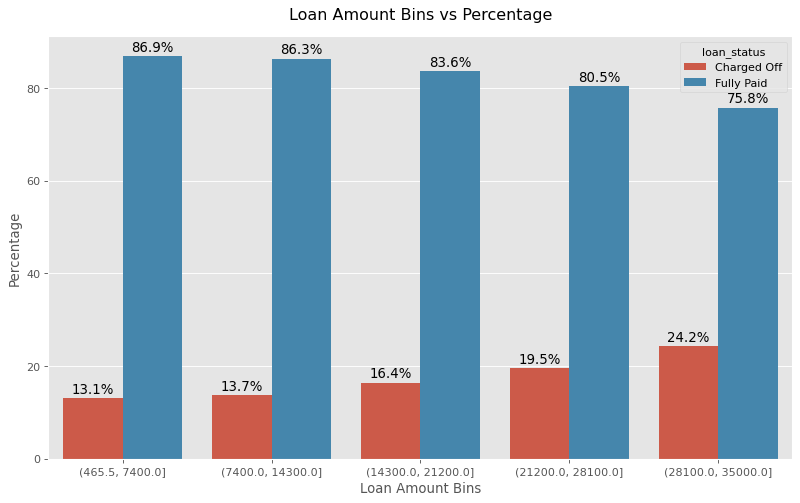

In [68]:
seg_uni_2(loan,'loan_amnt_bin',title='Loan Amount Bins vs Percentage',x='Loan Amount Bins',y='Percentage')

### Inference
- As the Loan Amount increases, the charge off percentage also increases, which means it is risky to provide higher loan amount 
- So while sanctioning loans with high amount (> $21,000) we should be more carefull

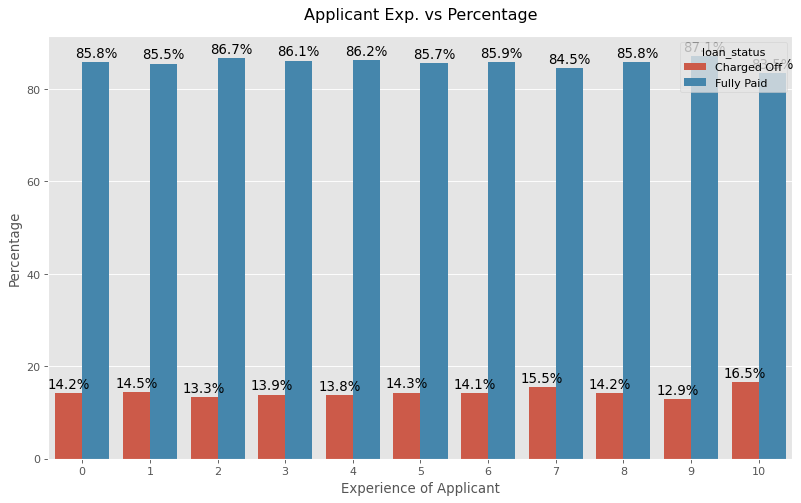

In [69]:
seg_uni_2(loan[loan.emp_length!=11],"emp_length",x='Experience of Applicant',y='Percentage',title='Applicant Exp. vs Percentage')

### Inference
- This means that, the experience of applicant do not have a major impact on whether the applicant will default or not

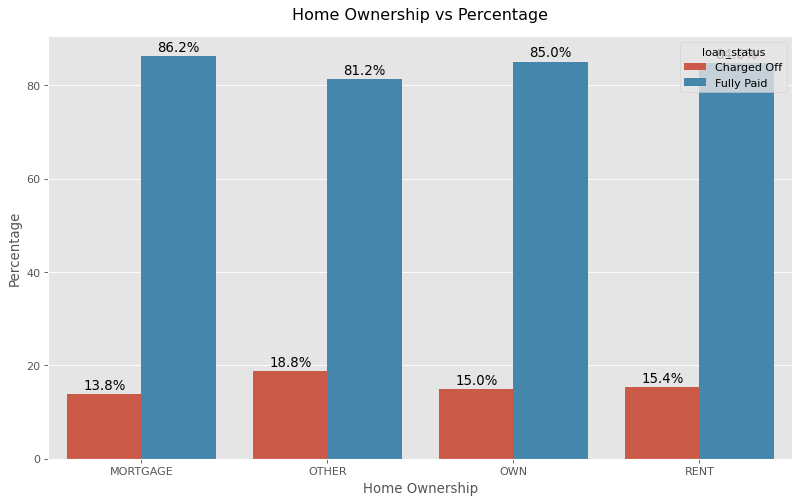

In [70]:
# neglecting rows where home_ownership is 'NONE'

data = loan[~(loan.home_ownership == 'NONE')]
seg_uni_2(data,"home_ownership",x='Home Ownership',y='Percentage',title='Home Ownership vs Percentage')

### Inference
- This means that <b> Home Ownership </b> also does not play an important role in predicting whether the applicant will default or not
- But we can say that we should take more care when sanctioning loans to applicant with `'Other'` home ownership

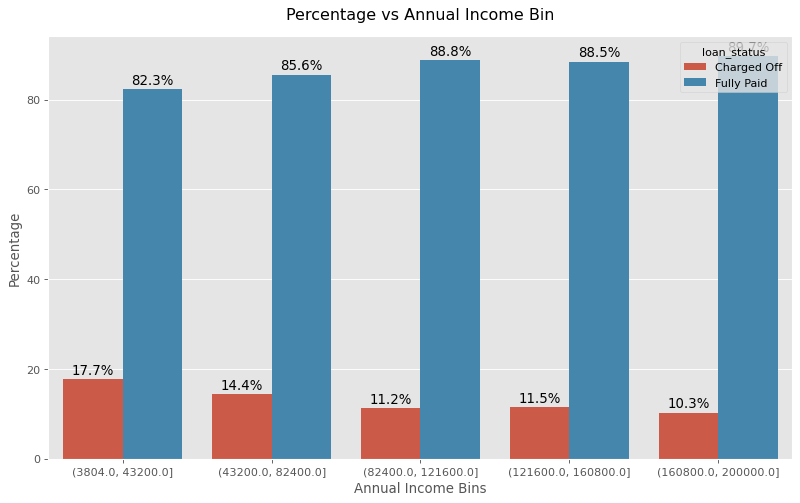

In [71]:
seg_uni_2(loan,"annual_inc_bin",x='Annual Income Bins',y='Percentage',title='Percentage vs Annual Income Bin')

### Inference
- As Income of applicant increase, they become less likely to get defaulted
- We should provide loans to applicant with high annual income
- And, also should be carefull while giving loans to applicant with low income (below $45000)

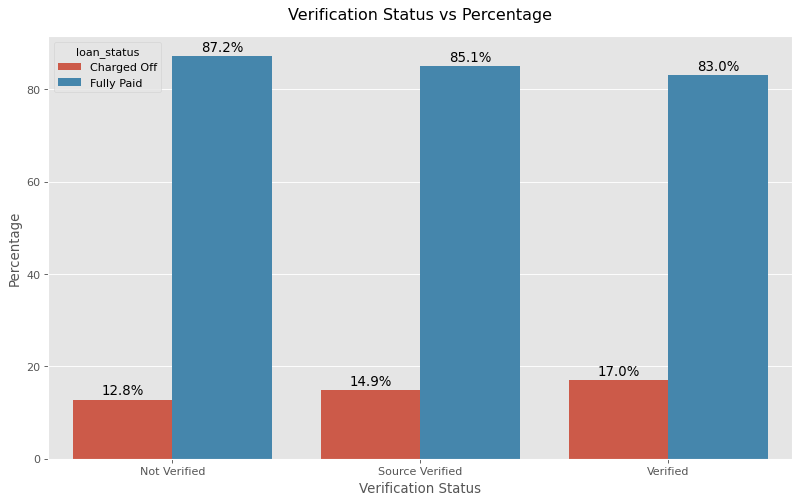

In [72]:
seg_uni_2(loan,"verification_status",x='Verification Status',y='Percentage',title='Verification Status vs Percentage')

### Inference
- It is very wired to say, but data shows that applicant with `'Verified'` & `'Source Verified'` Status are more likely to default than applicant with `'not Verified'` status
- This means that we need to improve our applicant income verification process 

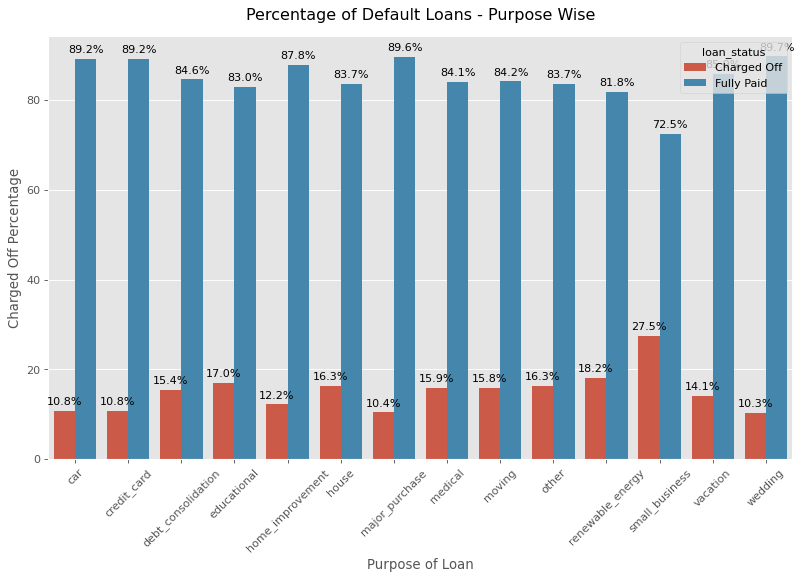

In [73]:
seg_uni_2(loan,"purpose",y='Charged Off Percentage',x='Purpose of Loan',size=10,rot=45,title="Percentage of Default Loans - Purpose Wise")

### Inference
- `'Small Businesses'` & `'renewable energy'` are the loan purpose where there is high default percentage. So we need to be very careful while sanctioning loans for above mention purposes.


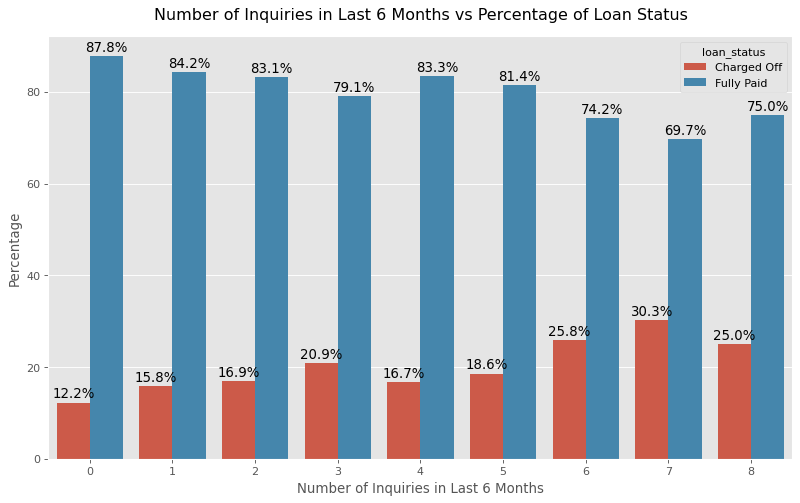

In [74]:
seg_uni_2(loan,"inq_last_6mths",x="Number of Inquiries in Last 6 Months",y='Percentage',title='Number of Inquiries in Last 6 Months vs Percentage of Loan Status')

### Inference
- We can say that, <b>if number of inquiries in last 6 months are more than 5, then it is more likely that the applicant will default</b>

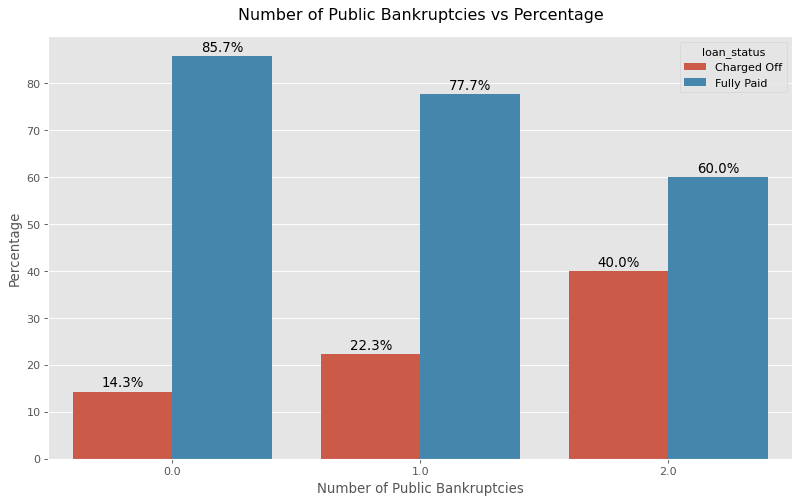

In [75]:
seg_uni_2(loan,"pub_rec_bankruptcies",x='Number of Public Bankruptcies',y='Percentage',title='Number of Public Bankruptcies vs Percentage')

### Inference
- It is <b>very risky</b> to provide loans to applicants with <b>2 public Bankruptcies</b>
- Also we need to be very careful when providing loans to applicant with 1 public Bankruptcies
- In fact, it is better to sanction loans to applicant with 0 public bankruptcies, as they are less likely to default

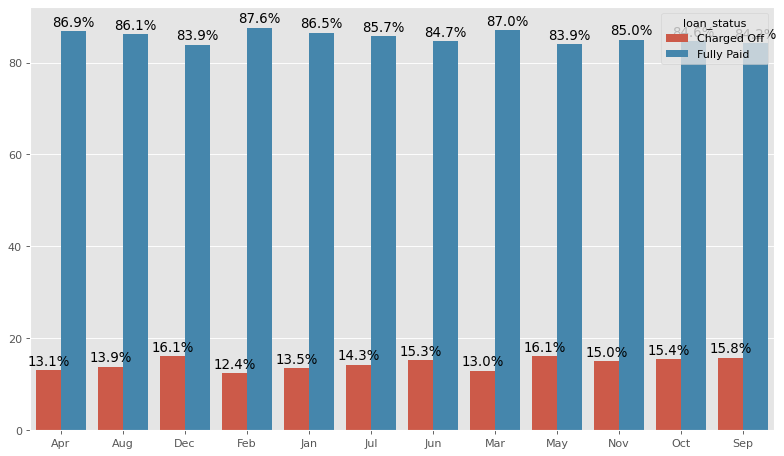

In [76]:
seg_uni_2(loan,"issue_m")

### Inference
- Issue Month of Loan do not indicate much about whether the applicant will default or not

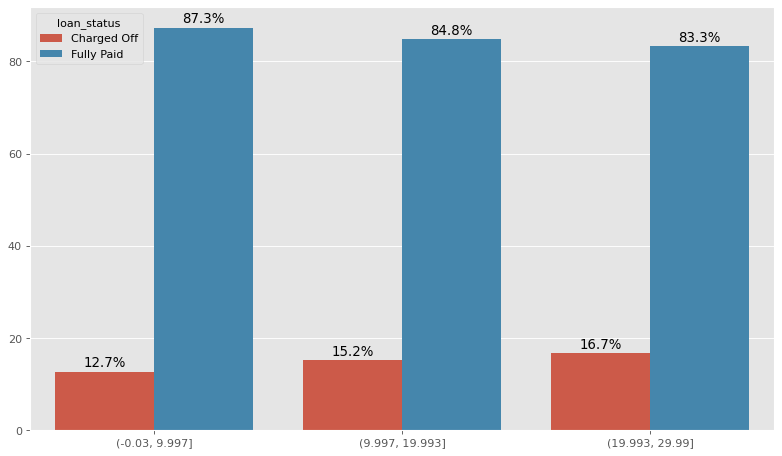

In [77]:
seg_uni_2(loan,"dti_bin")

### Inference
- Applicant with higher Dept to Income ratio are more likely to default, we need to avoid giving loans to applicant with higher DTI ratio (> 10)
- We should go with applicant with lesser DTI ratio.

In [78]:
#correlation table between continuos variable

round(loan.corr(),2)

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,inq_last_6mths,pub_rec_bankruptcies,issue_y
loan_amnt,1.00,0.35,0.30,0.13,0.41,0.07,0.01,-0.03,0.11
term,0.35,1.00,0.44,0.10,0.07,0.08,0.05,0.02,0.24
int_rate,0.30,0.44,1.00,-0.01,0.06,0.11,0.13,0.09,0.04
emp_length,0.13,0.10,-0.01,1.00,0.15,0.05,0.01,0.07,0.13
annual_inc,0.41,0.07,0.06,0.15,1.00,-0.10,0.04,-0.02,0.03
dti,0.07,0.08,0.11,0.05,-0.10,1.00,0.01,0.01,0.09
inq_last_6mths,0.01,0.05,0.13,0.01,0.04,0.01,1.00,0.02,-0.06
pub_rec_bankruptcies,-0.03,0.02,0.09,0.07,-0.02,0.01,0.02,1.00,0.01
issue_y,0.11,0.24,0.04,0.13,0.03,0.09,-0.06,0.01,1.00


<AxesSubplot:>

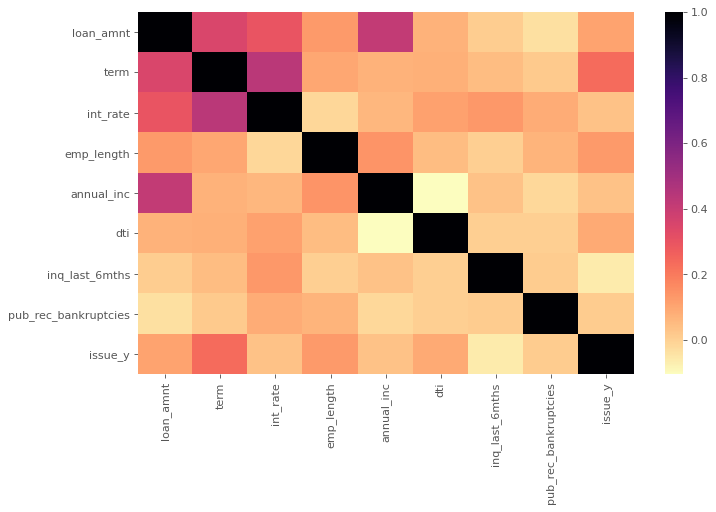

In [79]:
plt.figure(figsize=(10,6),dpi=80)
plt.style.use('ggplot')
sns.heatmap(loan.corr(),cmap = 'magma_r')

- We can see that following pairs of columns are correlated
    - `'int_rate'` & `'term'`
    - `'annual_inc'` & `'loan_amnt'`
    - `'loan_amnt'` & `'term'`
    - `'loan_amnt'` & `'int_rate'`

# Bivariate Analysis

# <font color=blue> Functions for Univariate Analysis </font>

1. _**bivariate:**_ This function is used to plot bar chart with percentage of Charged Off Loans w.r.t any other 2 attributes

In [80]:
def bivariate(df,col1,col2,orient='v',x='',y='',title='',font_s=12,size=(15,6)) :

    # df : Dataset
    # col1 & col2 : columns on which bivariate analysis is to be performed
    # col1 : Columns to be represented on x-axis
    # col2 : Columns to be represented with legend
    # orient : orientation of bar plot ('v' or 'h')
    # x : x-axis label on the plot
    # y : y-axis label on the plot
    # title : title of the plot
    # font_s : font size of annotation 
    # size : size of plot
    
    df2 = df[df.loan_status == 'Charged Off']
    t = df2.groupby([col1,col2])[['loan_amnt']].count().reset_index()
    t2 = df.groupby([col1,col2])[['loan_amnt']].count().reset_index()
    t3 = pd.merge(t,t2,on=[col1,col2])
    t3['per'] = t3['loan_amnt_x']*100/t3['loan_amnt_y']
    
    plt.figure(figsize=size,dpi=70,frameon=True)
    plt.style.use("ggplot")
    if orient == 'v' :
        g = sns.barplot(data=t3,x=col1,y='per',hue=col2,orient='v')
        for bar in g.patches:
            g.annotate(format(str(round(bar.get_height(),1)) + '%'), 
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()), ha='center', va='center',
                           size=font_s, xytext=(0, 8),
                           textcoords='offset points')
    else :
        g = sns.barplot(data=t3,y=col1,x='per',hue=col2,orient='h')
        for bar in g.patches:
            g.annotate(format(str(round(bar.get_width(),1)) + '%'), 
                           (bar.get_width()+1.4,bar.get_y() + bar.get_height() / 2 + 0.05, 
                            ), ha='center', va='center',
                           size=font_s, xytext=(0, 8),
                           textcoords='offset points')

    
    g.set(xlabel = x,ylabel = y)
    plt.title(title,pad=15)
    plt.show()

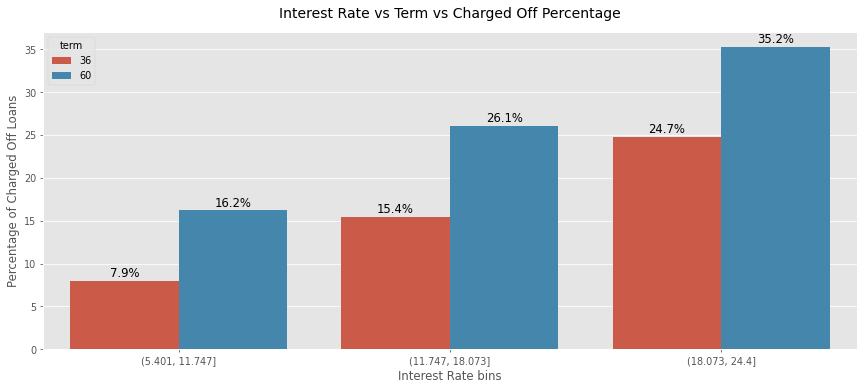

In [81]:
bivariate(loan,'int_rate_bin','term',x='Interest Rate bins',y='Percentage of Charged Off Loans',title='Interest Rate vs Term vs Charged Off Percentage')

## Inference
- Loans with Lower Interest Rates (less than 18%) with 36 months of term are likely to repay loans.
- Loans with Interest rates less than 12% with 60 months term are also likely to repay.
- All other combination of Interest Rates and Terms are very risky and are likely to default

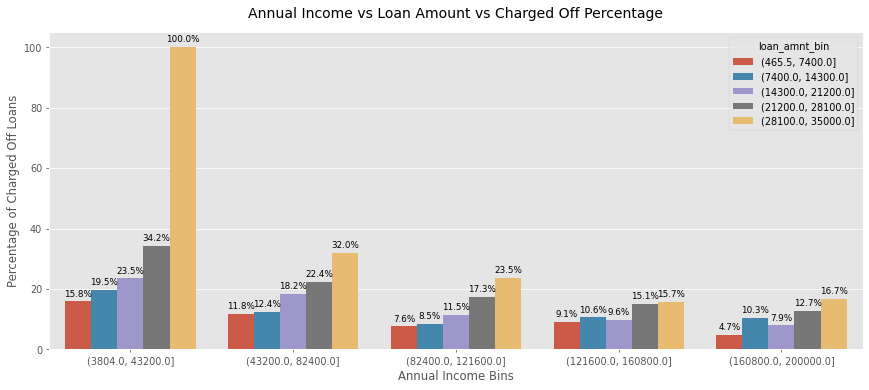

In [82]:
bivariate(loan,'annual_inc_bin','loan_amnt_bin',x='Annual Income Bins',y='Percentage of Charged Off Loans',title='Annual Income vs Loan Amount vs Charged Off Percentage',font_s=9)

### Inference
- For Applicant with Annual Income less than 43,000 , it is very risky to provide loans more than 14,000
- Providing Loan more than 21,000 is risky for applicant having annual income less than 82,400
- Applicant with less than 120,000 annual income, it is riskly to provide loans more than 28,000
- It is always safe to provide loans to applicant with high annual income (> 120,000)

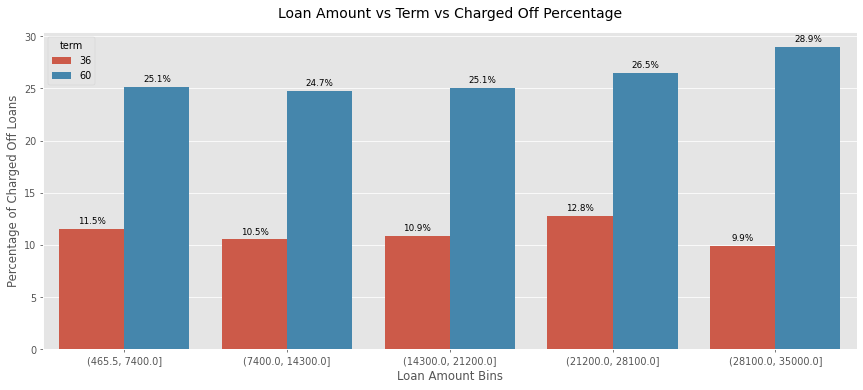

In [83]:
bivariate(loan,'loan_amnt_bin','term',x='Loan Amount Bins',y='Percentage of Charged Off Loans',title='Loan Amount vs Term vs Charged Off Percentage',font_s=9)

### No Major Inference

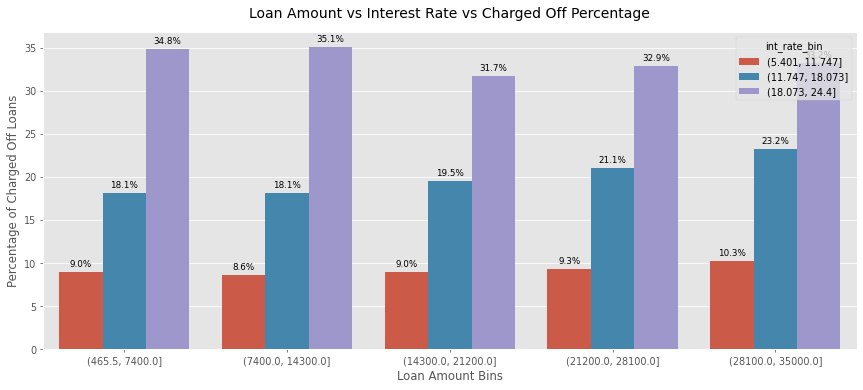

In [84]:
bivariate(loan,'loan_amnt_bin','int_rate_bin',x='Loan Amount Bins',y='Percentage of Charged Off Loans',title='Loan Amount vs Interest Rate vs Charged Off Percentage',font_s=9)

### Inference
- It is always very Risky to provide loans with High Interest Rates (> 18%) irrespective of Loan Amount
- Providing loans more than 21,000 with interest rate more than 12% are more likely to default
- We should consider providing loans with less interest rates as they are very likely to repay

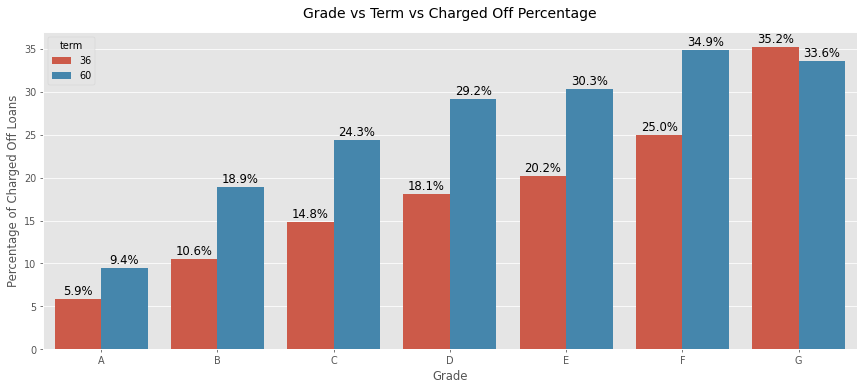

In [85]:
bivariate(loan,'grade','term',x='Grade',y='Percentage of Charged Off Loans',title='Grade vs Term vs Charged Off Percentage')

### Inference
- Applicant with lower than `'B'` grade with 60 months Term are more likely to get default
- Applicant with lower than `'E'` grade with 36 months Term are also likely to get default

<center>OR</center>

- We should consider giving loans to applicant with grade `'B or higher'` for both terms
- We can also consider providing loans to applicant with grade `'D or higher'` with only 36 Months Term

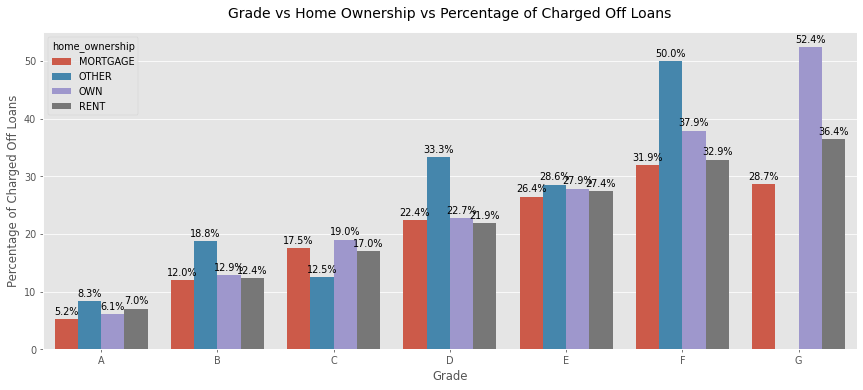

In [86]:
bivariate(loan,'grade','home_ownership',x='Grade',y='Percentage of Charged Off Loans',title='Grade vs Home Ownership vs Percentage of Charged Off Loans',font_s=10)

### Inference
- Providing loans to `'D or lower'` grade applicant with any kind of home ownership is risky

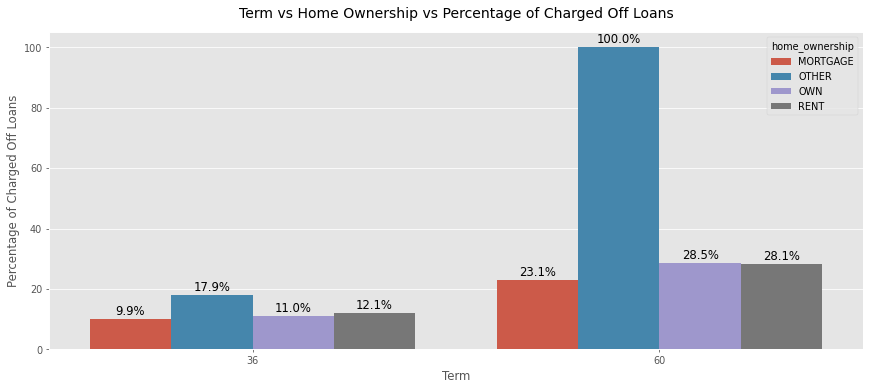

In [87]:
bivariate(loan,'term','home_ownership',x='Term',y='Percentage of Charged Off Loans',title='Term vs Home Ownership vs Percentage of Charged Off Loans',font_s=12)

### Inference
- Providing Loans to applicant with `'Mortgage' , 'Own' , 'Rent'` type home ownership and with 36 months terms is very safe

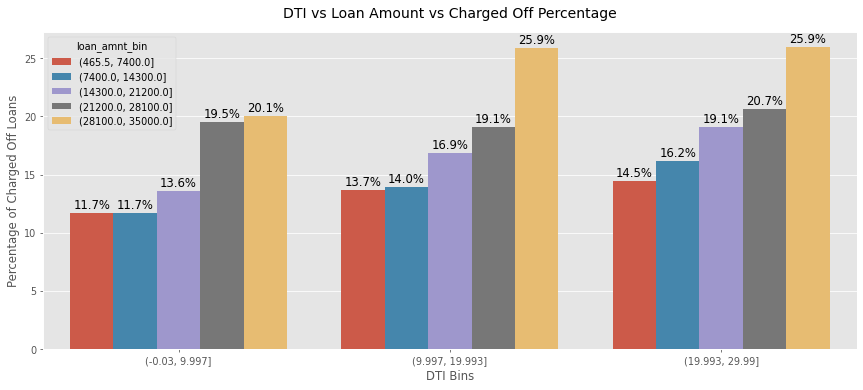

In [88]:
bivariate(loan,'dti_bin','loan_amnt_bin',x='DTI Bins',y='Percentage of Charged Off Loans',title='DTI vs Loan Amount vs Charged Off Percentage',font_s=12)

### Inference
- Applicant with Loan amount more than 28,000 are very likely to get default having DTI more than 10
- Applicant with Loan amount more than 21,000 are quite likely to get default irrespective of DTI 




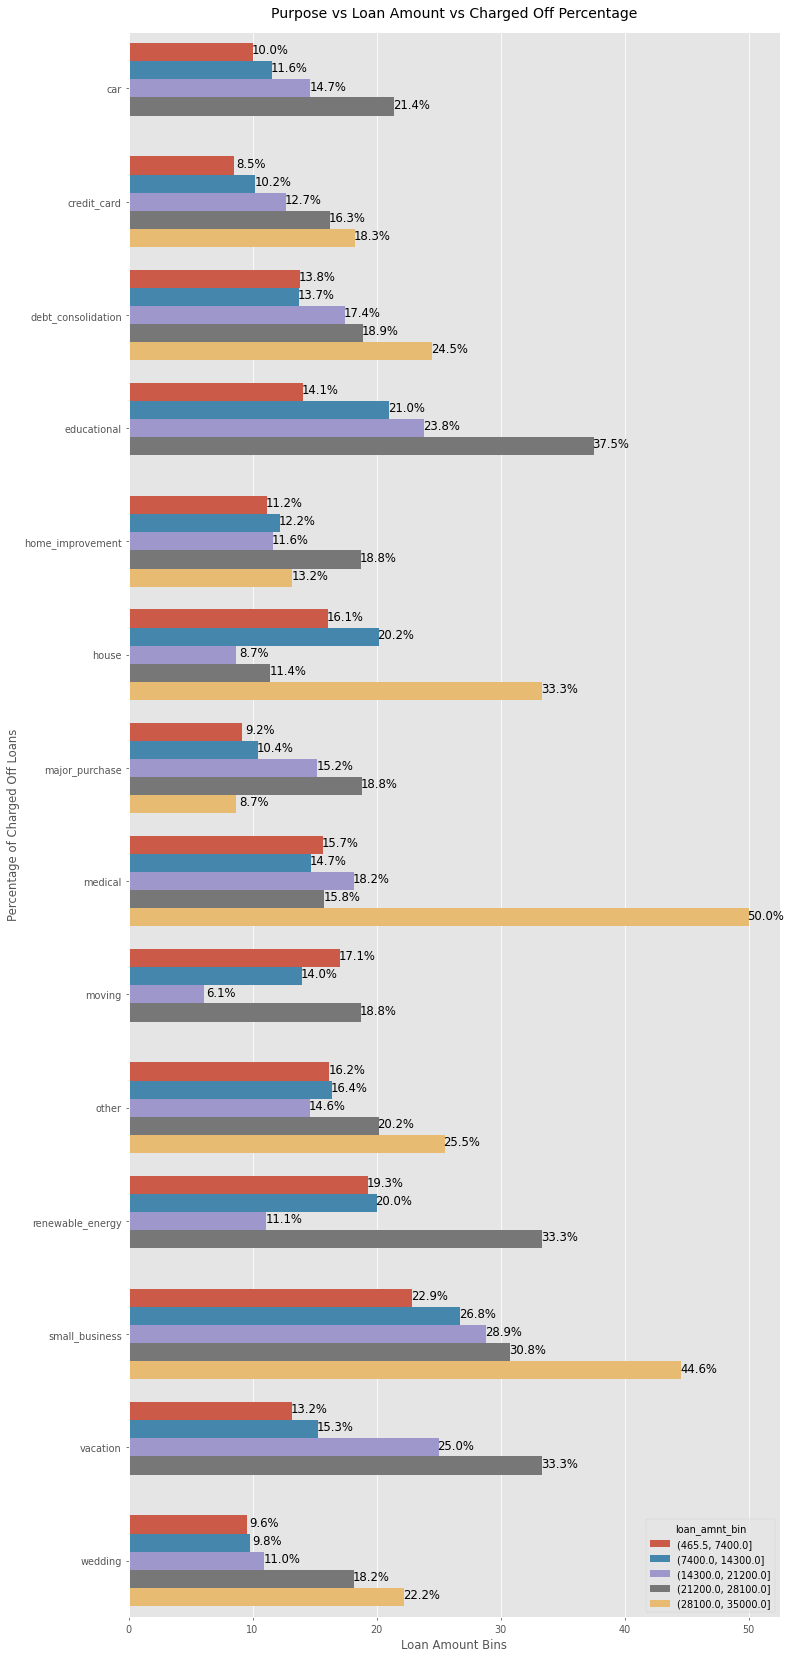

In [89]:
bivariate(loan,'purpose','loan_amnt_bin','h',x='Loan Amount Bins',y='Percentage of Charged Off Loans',title='Purpose vs Loan Amount vs Charged Off Percentage',font_s=12,size=(12,30))

### Inference

- Loans with purpose of `'Small Business'` are highly likely to get default irrespective of loan amount
- Loans with purpose of `'Vacation'` with more than 14,000 are likely to default
- Loans with purpose of `'Wedding'` with more than 21,000 are likely to default
- Loans with purpose of `'Medical'` with more than 28,000 are likely to default
- Loans with purpose of `'House'` with more than 28,000 are likely to default
- Loans with purpose of `'Education'` with more than 7,400 are likely to default
- Loans with purpose of `'Dept Consolidation'` with more than 28,000 are likely to default
- Loans with purpose of `'Car'` with more than 21,000 are likely to default

Function that gives the relation between a <b>Variable</b> and the <b>Target Variable ('loan_status')</b> in terms of <b>Percentage</b>

In [90]:
def get_relation_with_target(df,cols) :
    # df : the dataframe in which the data is present
    # cols : List of columns for which the relation with target variable is to be calculated
    results = {}
    for i in cols :
        t_df = pd.pivot_table(data=df,index=i,columns="loan_status",values="loan_amnt",aggfunc="count")
        t_df["Total Loans"] = t_df.sum(axis=1)
        t_df["Charged Off"] = round(t_df["Charged Off"]*100/t_df["Total Loans"],2)
        t_df["Fully Paid"] = round(t_df["Fully Paid"]*100/t_df["Total Loans"],2)
        t_df.reset_index(inplace=True)
        ans = list(t_df['Charged Off'])
        results[i] = round(max(ans)-min(ans),2)  # getting range of percentage within categorical analysis per column
    return results

In [91]:
list_col = ['term','grade','emp_length','home_ownership','verification_status','purpose','inq_last_6mths'
            ,'pub_rec_bankruptcies','issue_m','int_rate_bin','loan_amnt_bin','annual_inc_bin','dti_bin','sub_grade']

result = get_relation_with_target(loan,list_col)

# sorting result in descending order of percentage
sort_result = sorted(result.items(), key = lambda kv:(kv[1], kv[0])) 

# printing the columns with percentage relation with target variable in sorted order 
for i in sort_result[::-1] :
    print(i[0] + ' : ' + str(i[1]) + "%")

sub_grade : 46.88%
grade : 27.88%
pub_rec_bankruptcies : 25.7%
int_rate_bin : 24.48%
inq_last_6mths : 18.07%
purpose : 17.19%
term : 14.36%
loan_amnt_bin : 11.13%
annual_inc_bin : 7.42%
home_ownership : 4.96%
verification_status : 4.13%
dti_bin : 4.03%
issue_m : 3.75%
emp_length : 3.64%


- This simply means that `'grade'` attribute is 27.88% related to final variable, i.e., `'loan_status'`.<br>
Same for other attributes as well

## Final Inference

We can see that `'Sub Grade'`, `'Grade'`, `'Public Bankruptcies'`, `'Interest Rate'`, `'Inquires in Last 6 Months'`, `'Purpose'`, `'Term'` & `'loan_amnt'` are the  _**driving factors**_ behind loan `default`, i.e. the variables which are strong indicators of default. The company can further utilise this knowledge for its `portfolio and risk assessment`.
